# <center> LAb 6b: NCA, LDA and PCA with Kernels functions<br> Kernel Principal Components Analysis (KPCA)<br>Kernel Linear Discriminant Analysis(KLDA)<br> <small>Réda DEHAK<br> 25 june 2021</small> </center>

The goal of this lab is :

    - Reproduce the result of this scientific paper about NCA: 
[J. Goldberger, G. Hinton, S. Roweis, R. Salakhutdinov, "Neighbourhood Components Analysis", Advances in Neural Information Processing Systems, vol 17, pp. 513-520, 2005.](https://www.cs.toronto.edu/~hinton/absps/nca.pdf)
    
     - Test and use KPCA and KLDA:
[S. Mika, G. Rätsch,J. Weston,B. Schölkopf, KR. Müller, "Fisher discriminant analysis with kernels", Neural Networks for Signal Processing, vol IX. pp. 41–48, 1999.](https://doc.ml.tu-berlin.de/publications/publications/MikRaeWesSchMue99.pdf)
    
    
We will use the [optdigits dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/) from UCI. This database is a small set of handwritten digits compared to the MNIST databases. A preprocessing program available by NIST was used to extract 64 features which represent the number of on pixel of nonoverlapping blocks of 4x4 extracted from normalized image. [See](optdigits.names.txt) for more details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(trainfile, testfile):
    dataTrain = pd.read_csv(trainfile, header=None)
    dataTest = pd.read_csv(testfile, header=None)

    Xtrain = dataTrain.values[:,0:-1]
    ytrain = dataTrain.values[:,-1]

    Xtest = dataTest.values[:,0:-1]
    ytest = dataTest.values[:,-1]
    
    return(Xtrain, ytrain, Xtest, ytest)

### Part 1: Neighborhood Components Analysis (NCA)

1- Load circles, wines, spiral and optdigits dataset

In [3]:
datawines = loadData('wine.tra', 'wine.tes')
datacircles = loadData('circles.tra', 'circles.tes')
dataspiral = loadData('spiral.tra', 'spiral.tes')
dataoptdigit = loadData('optdigits.tra', 'optdigits.tes')

In [4]:
Datas = [('Circles', datacircles), ('Wines', datawines),  ('Optdigits', dataoptdigit)]
print(Datas[2][1][0])

[[ 0  1  6 ...  1  0  0]
 [ 0  0 10 ...  3  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  3 ...  9  0  0]
 [ 0  0  6 ... 16  5  0]
 [ 0  0  2 ...  0  0  0]]


2- Train a KNN classifier on training data, and compute the performance on test data using different values of k.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
ngh = KNeighborsClassifier(n_neighbors=2)
ngh.fit(Datas[1][1][0], Datas[1][1][1])
print(ngh.score(Datas[1][1][0], Datas[1][1][1]))
print(ngh.score(Datas[1][1][2], Datas[1][1][3]))


ngh2 = KNeighborsClassifier(n_neighbors=3)
ngh2.fit(Datas[1][1][0], Datas[1][1][1])
print(ngh2.score(Datas[1][1][0], Datas[1][1][1]))
print(ngh2.score(Datas[1][1][2], Datas[1][1][3]))


ngh3 = KNeighborsClassifier(n_neighbors=4)
ngh3.fit(Datas[1][1][0], Datas[1][1][1])
print(ngh3.score(Datas[1][1][0], Datas[1][1][1]))
print(ngh3.score(Datas[1][1][2], Datas[1][1][3]))

0.8732394366197183
0.75
0.852112676056338
0.7777777777777778
0.8028169014084507
0.7222222222222222


3- try to compare the result of PCA, LDA and NCA on these data. Plot the projection of test data using PCA, LDA and NCA into two first axis.

In [6]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)
Classifiers = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

4- Train a KNN classifier on training data, and compute the performance on test data using a PCA, LDA, NCA.

In [7]:
for i, (name, model) in enumerate(Classifiers):
    for (named, d) in Datas:
        d2=model.fit_transform(d[0],d[1])  
        ngh=KNeighborsClassifier(n_neighbors=2)
        ngh.fit(d2,d[1])
#         print(named,name)
        print(ngh.score(model.transform(d[2]),d[3]),name,named)

1.0 PCA Circles
0.7222222222222222 PCA Wines
0.5364496382860323 PCA Optdigits
1.0 LDA Circles
0.9722222222222222 LDA Wines
0.5759599332220368 LDA Optdigits
1.0 NCA Circles
0.9722222222222222 NCA Wines
0.6605453533667223 NCA Optdigits


5- Conclude, How to improve the performances of these methods (show an example)?

In [8]:
#We can improve the performances by raising the numbers of components used in ne PCA/LDA,NCA
pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)
Classifiers = [('PCA', pca), ('LDA', lda), ('NCA', nca)]
for i, (name, model) in enumerate(Classifiers):
    for (named, d) in Datas:
        d2=model.fit_transform(d[0],d[1])  
        ngh=KNeighborsClassifier(n_neighbors=5)
        ngh.fit(d2,d[1])
#         print(named,name)
        print(ngh.score(model.transform(d[2]),d[3]),name,named)

1.0 PCA Circles
0.75 PCA Wines
0.5731775180856984 PCA Optdigits
1.0 LDA Circles
0.9722222222222222 LDA Wines
0.6199220923761826 LDA Optdigits
1.0 NCA Circles
0.9722222222222222 NCA Wines
0.7039510294936004 NCA Optdigits


### Part 2: Nolinear dimension reduction (Kernel Methods)

- Train a KPCA with linear kernel and compare the result to the classical PCA

In [9]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [10]:
pca_simple=PCA(n_components=2)
pca_simple.fit(X)
X_transformed=pca_simple.transform(X)
print(X_transformed[0])

kpca_linearkrnl=KernelPCA(n_components=3, kernel='linear')
kpca_linearkrnl.fit(X)
X_transformed2=kpca_linearkrnl.transform(X)
print(X_transformed2[0])

[0.71689036 0.51756604]
[0.71689036 0.51756604 0.        ]


- Test the result with polynomial and RBF kernels

In [11]:
kpca_polykrnl=KernelPCA(n_components=6, kernel='poly',degree=2)
kpca_polykrnl.fit(X)
X_transformed3=kpca_polykrnl.transform(X)
print(X_transformed3[0])


kpca_rbfkrnl=KernelPCA(n_components=7, kernel='rbf')
kpca_rbfkrnl.fit(X)
X_transformed4=kpca_rbfkrnl.transform(X)
print(X_transformed4[0])

[ 0.71678206  0.51968558  0.11847969 -0.24639507  0.07711328  0.        ]
[ 0.5871431   0.20512666  0.13612881 -0.10249735 -0.24844354  0.02199329
 -0.09417008]


- Write a function that fit a KLDA on the X dataset, use the kernel function as a parameter.

- Train a KLDA with linear kernel and compare the result to the classical LDA

In [12]:
def fit_KLDA(X,y,kernel,degree=None):
    lda=LinearDiscriminantAnalysis()
    if degree != None: 
        krnl=kernel(X=X,degree=degree)
    else:
        krnl=kernel(X=X)
    lda.fit(krnl,y)
    score=lda.score(krnl,y)
    return lda,score


lda2 = LinearDiscriminantAnalysis()
lda2.fit(X,y)
print('Simple LDA:',lda2.score(X,y))

# X_new=np.hstack((X,y.reshape(-1,1)))
X_new=X
lda2_lin,score_link=fit_KLDA(X_new,y,linear_kernel)
print("linear kernel LDA:",score_link)

lda2_pol,score_polk=fit_KLDA(X_new,y,polynomial_kernel,degree=2)
print("poly kernel LDA:",score_polk)

lda2_rbf,score_rbfk=fit_KLDA(X_new,y,rbf_kernel)
print("RBF kernel LDA:",score_rbfk)


Simple LDA: 0.5025
linear kernel LDA: 0.5025
poly kernel LDA: 1.0
RBF kernel LDA: 1.0


- Try to use a KPCA of the optdigit data (use different kernel functions)
- Plot each example of the testing data in the first two factorial axis of PCA(2D space), use different color foreach classe? compare with the classical PCA, what did you conclude?

In [13]:
Xtrain_optdigit,ytrain_optdigit,Xtest_optdigit,ytest_optdigit=dataoptdigit

pca_simple=PCA(n_components=2)
pca_simple.fit(Xtrain_optdigit)
Xtrain_optdigit_transformed=pca_simple.transform(Xtrain_optdigit)
print(Xtrain_optdigit_transformed[0])

kpca_linearkrnl=KernelPCA(n_components=2, kernel='linear')
kpca_linearkrnl.fit(Xtrain_optdigit)
Xtrain_optdigit_transformed2=kpca_linearkrnl.transform(Xtrain_optdigit)
print(Xtrain_optdigit_transformed2[0])

kpca_polykrnl=KernelPCA(n_components=2, kernel='poly',degree=2)
kpca_polykrnl.fit(Xtrain_optdigit)
Xtrain_optdigit_transformed3=kpca_polykrnl.transform(Xtrain_optdigit)
print(Xtrain_optdigit_transformed3[0])


kpca_rbfkrnl=KernelPCA(n_components=2, kernel='rbf')
kpca_rbfkrnl.fit(Xtrain_optdigit)
Xtrain_optdigit_transformed4=kpca_rbfkrnl.transform(Xtrain_optdigit)
print(Xtrain_optdigit_transformed4[0])

[12.4458038  -4.71301287]
[12.44580352 -4.71301334]
[ 15.59292244 -10.46225379]
[ 0.00652944 -0.00084095]


- Train a KNN on the projected data into the $d$ first factorial axis of KPCA, and test the performances on the testing data? try different values of $d$ and $k$?  

We will try a Kernel Linear Discriminant Analysis method to separate the 10 classes. Train a Kernel Linear Discriminant Analysis on the training data and plot each example in the 2d plan corresponding to the two axis with largest eigen values? what did you conclude? (use different kernel functions)

Train a KNN on the projected data into the $d$ first axis of KLDA and test the performances on the testing data? try different values of $d$ and $k$?

Compare the performances of the KNN with PCA, LDA, NCA, KPCA and KLDA?

$$ 
FISHER's Linear Discriminant
$$
$$  
J(w)= \frac{w^TS_Bw}{w^TS_Ww}
$$
$$
S_B:= (\frac{1}{l_1}\sum_{j=1}^{l_1}x_j^1 - \frac{1}{l_2}\sum_{j=1}^{l_2}x_j^2) (\frac{1}{l_1}\sum_{j=1}^{l_1}x_j^1 - \frac{1}{l_2}\sum_{j=1}^{l_2}x_j^2)^T
$$
$$
S_W:= \sum_{i=1,2} \sum_{x \in X_i} (x-m_i)(x-m_i)^T
$$

$$
FISHER's$Discriminant

In [14]:
classes=list(set(y))
nb_classes=len(set(y))

print(nb_classes,X.shape)
class1=X[[i for i in range(y.shape[0]) if y[i] == classes[0]]]
class2=X[[i for i in range(y.shape[0]) if y[i] == classes[1]]]

l1=len(class1)
l2=len(class2)

m1= np.mean(class1,axis=0).reshape(-1,2)
m2= np.mean(class2,axis=0).reshape(-1,2)
print('m1',m1)
print('m2',m2)

SB=(m1-m2)@(m1-m2).T
print('SB:',SB)


S1=(class1-m1).T@(class1-m1)
print('S1',S1)

S2=(class2-m2).T@(class2-m2)
print('S2',S2)

# SW=(class1-m1).T@(class1-m1) + (class2-m2).T@(class2-m2)
SW= S1 + S2
print('SW:',SW)

V=(np.linalg.inv(SW)@(m1-m2).T).reshape(-1,1)
print('SW-1',V)
# print('SB/SW:',SB/SW)

print(V.shape,class1.shape)
print(V.T@class1.T)

2 (400, 2)
m1 [[ 0.00057027 -0.00767109]]
m2 [[-0.00180762 -0.00370207]]
SB: [[2.14074471e-05]]
S1 [[100.65310727  -0.75904397]
 [ -0.75904397 100.2986766 ]]
S2 [[9.4258856  0.19334786]
 [0.19334786 9.44739373]]
SW: [[110.07899287  -0.56569611]
 [ -0.56569611 109.74607033]]
SW-1 [[ 2.14163405e-05]
 [-3.60550804e-05]]
(2, 1) (200, 2)
[[ 1.96871563e-05 -4.24096297e-05 -2.44816677e-05 -3.70898462e-05
   1.64807640e-05  2.56250376e-05 -2.74797842e-06  4.45993705e-06
   5.63932607e-06  2.71750632e-05  3.86397159e-05  6.90546598e-06
   3.25451666e-05 -1.99238552e-05 -3.17551238e-05  3.87790800e-05
  -2.73849833e-05 -1.15282023e-05  2.15171429e-05  4.44706189e-05
   8.01917310e-06 -4.04342457e-05 -1.54083655e-05  3.49508420e-05
  -1.55602864e-05  4.25442281e-05 -3.82801585e-05 -3.66813599e-05
   3.91608582e-05  3.42082029e-05  2.81778815e-05  1.54124152e-06
  -1.57694545e-05 -1.31332793e-05  1.34002831e-05 -3.54357062e-05
  -3.95429330e-05 -3.75382509e-05  5.50354460e-06  2.37444614e-05
  -1.

In [119]:
def linear_kernel2(X,y=None):
    if y != None:
        return np.hstack((X,y.reshape(-1,1)))
    else:
        return X  
     
def polynomial_kernel2(X,y=None,degree=2):
    if y == None:
        y = X
    return (X.T @ y + 1)**degree

In [120]:
# polynomial_kernel(X,y,degree=2).shape
X_new=np.hstack((X,y.reshape(-1,1)))
polynomial_kernel2(X_new,degree=2).shape

(400, 400)

In [171]:
class KLDA:
    def __init__(self,kernel,degree=None):
        self.kernel=kernel
        self.degree=degree
    
    def fit(self,X,y):
        self.classes=list(set(y))
        self.nbclasses=len(self.classes)
        if self.degree == None: 
            X_kernel=self.kernel(X)
        else:
            X_kernel=self.kernel(X,degree=self.degree)
        print(np.mean(X_kernel),axis=0)
        
        self.class1=X_kernel[[i for i in range(y.shape[0]) if y[i] == self.classes[0]]]
        self.class2=X_kernel[[i for i in range(y.shape[0]) if y[i] == self.classes[1]]]
        self.l1=len(self.class1)
        self.l2=len(self.class2)
        self.m1= np.mean(self.class1,axis=0).reshape(-1,self.class1.shape[1])
        self.m2= np.mean(self.class2,axis=0).reshape(-1,self.class1.shape[1])
        self.SB=(self.m1-self.m2)@(self.m1-self.m2).T
        self.S1=(self.class1-self.m1).T@(self.class1-self.m1)
        self.S2=(self.class2-self.m2).T@(self.class2-self.m2)
        self.SW= self.S1 + self.S2
        self.V=(np.linalg.inv(self.SW)@(self.m1-self.m2).T).reshape(-1,1)
        
        
    def predict(self,X):
        if self.degree == None: 
            X_kernel=self.kernel(X)
        else:
            X_kernel=self.kernel(X,degree=self.degree)
        predictions=self.V.T@X_kernel.T
        print(predictions)
        return np.sign(predictions)

In [169]:
klda=KLDA(polynomial_kernel2,degree=2)
klda=KLDA(polynomial_kernel,degree=2)
klda.fit(X,y)
preds=klda.predict(X).T

(400, 400)
[[12.83534841 12.98864925 12.98193581 12.56983575 12.95889927 12.58343057
  12.95241616 12.58485647 12.56562699 12.95620449 12.87205927 13.0286477
  12.55669962 12.56820755 12.56570643 12.9505434  12.54659686 12.56045943
  12.61601834 12.5647984  12.55695823 12.90108573 12.55518065 12.91716694
  12.5902682  12.56557153 12.60180261 12.56273568 12.56959035 12.55361211
  12.58482496 12.58910122 12.89169234 12.88369882 12.91001993 12.94413518
  12.9386036  12.98256735 12.96434307 13.00348983 12.54889223 12.5572883
  12.55562876 13.04954686 12.55828969 13.00020552 12.98426478 12.5760538
  13.00466625 12.98957068 12.56827717 12.91666514 12.5685604  12.56573909
  12.95924723 12.98146284 12.98275858 12.57293902 12.90993962 12.90874976
  12.56512518 12.56422766 13.01960525 13.00774512 12.95280044 12.93030096
  12.57475119 12.87501966 13.0004249  12.55651079 12.56107638 12.55488383
  12.93087959 12.91603593 13.04544997 12.96311009 12.9214188  12.58094226
  12.57433693 12.93751134 12.9

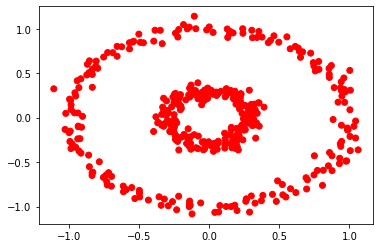

In [170]:
import matplotlib.pyplot as plt
colors=['r' if preds[i] == 1 else 'b' for i in range(len(preds))]
plt.scatter(X[:,0].reshape(-1,1),X[:,1].reshape(-1,1),color=colors)

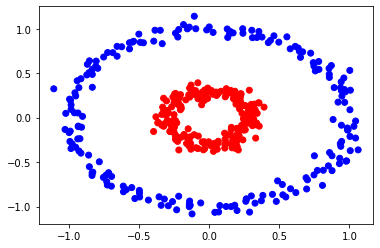

In [142]:
colors=['r' if y[i] == 1 else 'b' for i in range(len(y))]
plt.scatter(X[:,0].reshape(-1,1),X[:,1].reshape(-1,1),color=colors)

In [293]:
c1=[(1,2),(2,3),(3,3),(4,5),(5,5)]
c2=[(1,0),(2,1),(3,1),(3,2),(5,3),(6,5)]

c1=np.array(c1).reshape(len(c1),2)
c2=np.array(c2).reshape(len(c2),2)
mu1=np.mean(c1,axis=0)
mu2=np.mean(c2,axis=0)

s1=(c1-mu1).T@(c1-mu1)
print('s1',s1)
s2=(c2-mu2).T@(c2-mu2)
print('s2',s2)
sw=s1+s2
print('sw',sw)
print('sw-1',np.linalg.inv(sw))
v=(np.linalg.inv(sw).T@(mu1-mu2)).reshape(-1,1)
print('v',v)

print(c1.shape,c2.shape,v.shape)
y1=v.T@c1.T
print('y1',y1)

y2=v.T@c2.T
print('y2',y2)

s1 [[10.   8. ]
 [ 8.   7.2]]
s2 [[17.33333333 16.        ]
 [16.         16.        ]]
sw [[27.33333333 24.        ]
 [24.         23.2       ]]
sw-1 [[ 0.39908257 -0.41284404]
 [-0.41284404  0.47018349]]
v [[-0.79357798]
 [ 0.88990826]]
(5, 2) (6, 2) (2, 1)
y1 [[0.98623853 1.08256881 0.28899083 1.27522936 0.48165138]]
y2 [[-0.79357798 -0.69724771 -1.49082569 -0.60091743 -1.29816514 -0.31192661]]
